In [43]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook


plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'


from sklearn import metrics
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering,
                             SpectralClustering)
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [44]:
PATH_TO_SAMSUNG_DATA = 'mlcourse.ai/data/samsung_HAR/samsung_HAR/'
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  'samsung_train.txt'))
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                  'samsung_train_labels.txt')).astype(int)
X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                 'samsung_test.txt'))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA,
                                 'samsung_test_labels.txt')).astype(int)

In [45]:
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [46]:
y_train.shape, y_test.shape

((7352,), (2947,))

In [47]:
X = np.vstack([X_train, X_test])
y = np.vstack([y_train.reshape((7352, 1)), y_test.reshape((2947, 1))])
X.shape, y.shape

((10299, 561), (10299, 1))

In [48]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [49]:
n_classes = np.unique(y).size

In [50]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

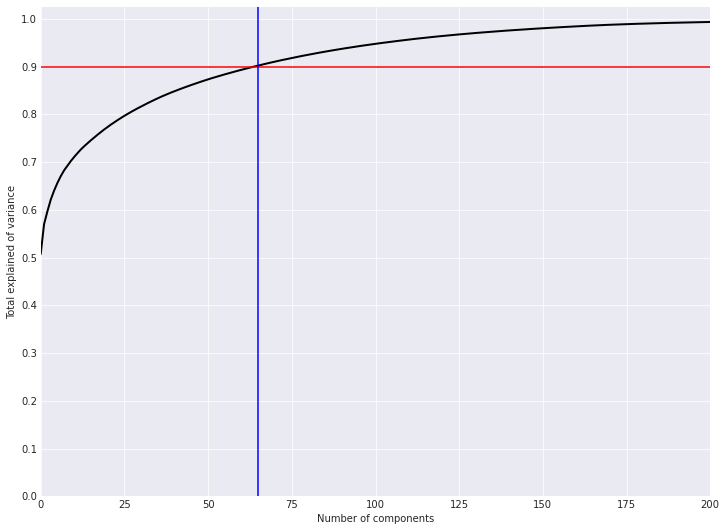

In [51]:
pca = PCA(random_state=RANDOM_STATE).fit(X)

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained of variance')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.axvline(65, c='b')
plt.show();

In [52]:
print(np.cumsum(pca.explained_variance_ratio_)[64])

0.9004833346822931


In [53]:
print(np.round(np.cumsum(pca.explained_variance_ratio_)[0] * 100))

51.0


Projecting 561-dimensional data to 2D


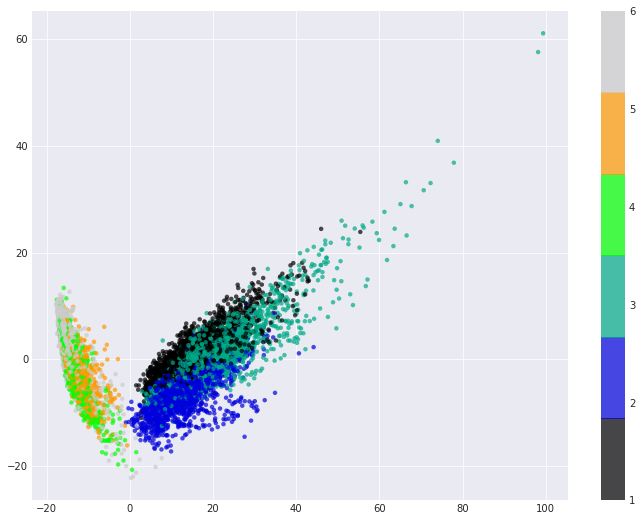

In [54]:
pca2 = PCA(n_components=2, random_state=RANDOM_STATE)
X_reduced = pca2.fit_transform(X)

print(f'Projecting {X.shape[1]}-dimensional data to 2D')

plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y,
            edgecolor='none',
            alpha=0.7,
            s=20,
            cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar();

In [60]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

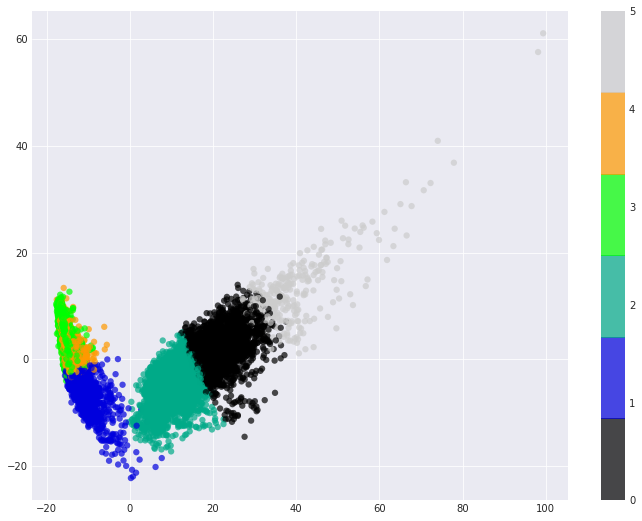

In [61]:
kmeans = KMeans(n_clusters=n_classes, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
clusters = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=clusters,
            edgecolor='none',
            alpha=0.7,
            s=40,
            cmap=plt.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.show();

In [62]:
tab = pd.crosstab(y.ravel(), clusters.ravel(), margins=True)
tab.index = ['walking', 'going up the stairs',
             'going down the stairs', 'sitting',
             'standing', 'laying', 'all']
tab.columns = [f'cluster {i + 1}' for i in range(6)] + ['all']
tab

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,all
walking,741,0,903,0,0,78,1722
going up the stairs,296,2,1241,0,0,5,1544
going down the stairs,890,0,320,0,0,196,1406
sitting,0,450,1,91,1235,0,1777
standing,0,562,0,0,1344,0,1906
laying,0,329,5,1558,52,0,1944
all,1927,1343,2470,1649,2631,279,10299


In [63]:
tab = pd.crosstab(y.ravel(), clusters.ravel(), margins=True, normalize='index')
tab.index = ['walking', 'going up the stairs',
             'going down the stairs', 'sitting',
             'standing', 'laying', 'all']
tab.columns = [f'cluster {i + 1}' for i in range(6)]
tab

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6
walking,0.430314,0.000000,0.524390,0.000000,0.000000,0.045296
going up the stairs,0.191710,0.001295,0.803756,0.000000,0.000000,0.003238
going down the stairs,0.633001,0.000000,0.227596,0.000000,0.000000,0.139403
sitting,0.000000,0.253236,0.000563,0.051210,0.694992,0.000000
standing,0.000000,0.294858,0.000000,0.000000,0.705142,0.000000
laying,0.000000,0.169239,0.002572,0.801440,0.026749,0.000000
all,0.187106,0.130401,0.239829,0.160113,0.255462,0.027090


In [64]:
tab.max(axis=1).sort_values(ascending=False)

going up the stairs      0.803756
laying                   0.801440
standing                 0.705142
sitting                  0.694992
going down the stairs    0.633001
walking                  0.524390
all                      0.255462
dtype: float64

<ipython-input-65-28b9c9685dc3>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, n_classes + 1)):


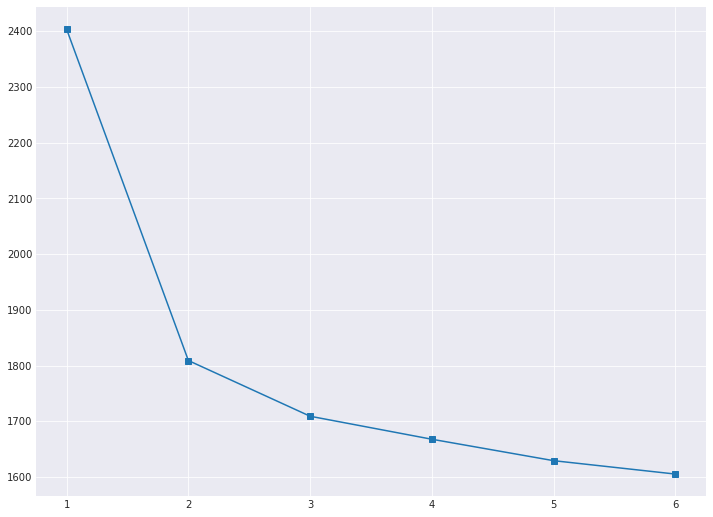

In [65]:
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    km = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE)
    km.fit(X)
    inertia.append(np.sqrt(km.inertia_))
plt.plot(range(1, n_classes + 1), inertia, marker='s')

In [66]:
ag = AgglomerativeClustering(n_clusters=n_classes,
                             linkage='ward').fit(X_pca)
res = {
    'ARI': [metrics.adjusted_rand_score(y.ravel(), ag.labels_),
            metrics.adjusted_rand_score(clusters, y.ravel())]
}
ari = pd.DataFrame(res, index=['Agglomerative', 'KMeans'])
ari

,ARI
Agglomerative,0.493628
KMeans,0.419807


In [67]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': np.logspace(-3, 1, 5)}

In [79]:
%%time
best_svc = GridSearchCV(svc, svc_params, cv=3, verbose=1, n_jobs=1)
best_svc.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Lib

CPU times: user 32.5 s, sys: 9.51 s, total: 42 s
Wall time: 24.8 s


/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=3, estimator=LinearSVC(random_state=17), n_jobs=1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             verbose=1)

In [80]:
best_svc.best_params_, best_svc.best_score_

({'C': 1.0}, 0.9464116548292103)

In [81]:
y_predicted = best_svc.predict(X_test_scaled)

In [82]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting',
             'standing', 'laying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
               'going down the stairs', 'sitting',
               'standing', 'laying', 'all']
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,laying,all
walking,439,33,4,12,8,0,496
climbing up the stairs,1,466,1,3,0,0,471
going down the stairs,1,16,375,10,18,0,420
sitting,2,6,0,346,136,1,491
standing,2,2,0,9,519,0,532
laying,1,2,1,30,18,485,537
all,446,525,381,410,699,486,2947


In [83]:
tp = []
tn = []
fp = []
fn = []
tab.drop(columns='all', index='all', inplace=True)
tab

,walking,climbing up the stairs,going down the stairs,sitting,standing,laying
walking,439,33,4,12,8,0
climbing up the stairs,1,466,1,3,0,0
going down the stairs,1,16,375,10,18,0
sitting,2,6,0,346,136,1
standing,2,2,0,9,519,0
laying,1,2,1,30,18,485


In [84]:
for c in tab.columns:
    tp.append(tab.loc[c][c])
    tn.append(tab.drop(columns=c, index=c).values.sum())
    fp.append(tab.drop(index=c)[c].sum())
    fn.append(tab.drop(columns=c).loc[c].sum())
res = {'TP': tp, 'TN': tn,
       'FP': fp, 'FN': fn}
prerec = pd.DataFrame(res, index=tab.columns)
prerec

,TP,TN,FP,FN
walking,439,2444,7,57
climbing up the stairs,466,2417,59,5
going down the stairs,375,2521,6,45
sitting,346,2392,64,145
standing,519,2235,180,13
laying,485,2409,1,52


In [85]:
precision = prerec['TP'] / (prerec['TP'] + prerec['FP'])
recall = prerec['TP'] / (prerec['TP'] + prerec['FN'])
precision.sort_values(ascending=False)

laying                    0.997942
walking                   0.984305
going down the stairs     0.984252
climbing up the stairs    0.887619
sitting                   0.843902
standing                  0.742489
dtype: float64

In [86]:
recall.sort_values(ascending=False)

climbing up the stairs    0.989384
standing                  0.975564
laying                    0.903166
going down the stairs     0.892857
walking                   0.885081
sitting                   0.704684
dtype: float64

In [87]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)
svc_reduced = LinearSVC(random_state=RANDOM_STATE)
best_svc_reduced = GridSearchCV(svc_reduced, svc_params, cv=3, verbose=1)
best_svc_reduced.fit(X_train_reduced, y_train)
best_svc_reduced.best_params_, best_svc_reduced.best_score_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/aleksandr/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Lib

({'C': 1.0}, 0.8998943094169531)

In [89]:
print(f'Difference in score: {(best_svc.best_score_ - best_svc_reduced.best_score_) * 100:.2f}%')

Difference in score: 4.65%


Text(0.5, 1.0, 't-SNE projection')

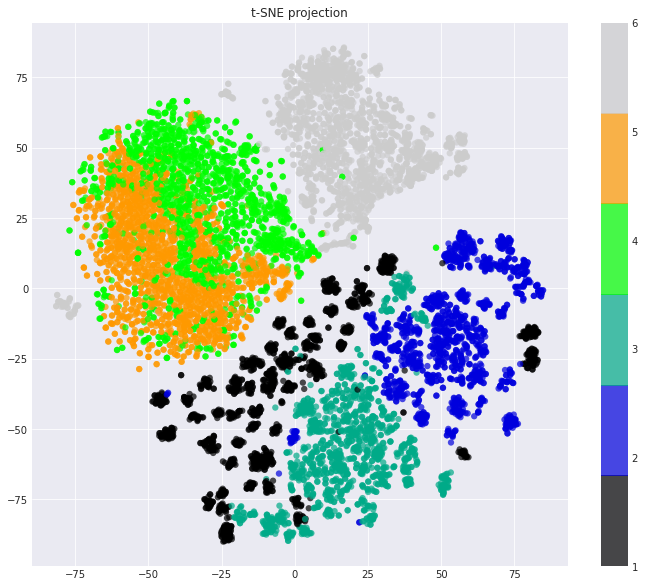

In [42]:
from sklearn.manifold import TSNE


tsne = TSNE(random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            c=y,
            edgecolor='none',
            cmap=plt.get_cmap('nipy_spectral', 6),
            alpha=0.7,
            s=40)
plt.colorbar()
plt.title('t-SNE projection')